## Loading Data Set

In [3]:
import pandas as pd
df = pd.read_csv("../data/advertising.csv")


## Basic Info

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.shape

(1000, 10)

In [6]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

## Renaming columns 

In [8]:
df = df.rename(columns={
    "Daily Time Spent on Site": "daily_time_on_site",
    "Age": "age",
    "Area Income": "area_income",
    "Daily Internet Usage": "internet_usage",
    "Ad Topic Line": "ad_topic",
    "City": "city",
    "Male": "male",
    "Timestamp": "timestamp",
    "Clicked on Ad": "clicked"
})


## Checking any missing values

In [9]:
df.isnull().sum()

daily_time_on_site    0
age                   0
area_income           0
internet_usage        0
ad_topic              0
city                  0
male                  0
Country               0
timestamp             0
clicked               0
dtype: int64

## Basic statistics:

In [10]:
df.describe()


,daily_time_on_site,age,area_income,internet_usage,male,clicked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Target distribution:

In [11]:
print(df["clicked"].value_counts())
print(df["clicked"].value_counts(normalize=True))

clicked
0    500
1    500
Name: count, dtype: int64
clicked
0    0.5
1    0.5
Name: proportion, dtype: float64


## Dropping unnecessary columns

In [12]:
df = df.drop(columns=["city"])
df.head()

,daily_time_on_site,age,area_income,internet_usage,ad_topic,male,Country,timestamp,clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,2016-06-03 03:36:18,0


## Converting Timestamp

In [13]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df.head()
# keeping time stamp for viusualizations

,daily_time_on_site,age,area_income,internet_usage,ad_topic,male,Country,timestamp,clicked,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,2016-04-04 01:39:02,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,2016-01-10 02:31:19,0,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,2016-06-03 03:36:18,0,3


## Analyzing ad catrgories

In [14]:
# Look at some topics to design categories
print(df["ad_topic"].head(20))
print(df["ad_topic"].sample(20, random_state=42))

0                Cloned 5thgeneration orchestration
1                Monitored national standardization
2                  Organic bottom-line service-desk
3             Triple-buffered reciprocal time-frame
4                     Robust logistical utilization
5                   Sharable client-driven software
6                        Enhanced dedicated support
7                          Reactive local challenge
8                    Configurable coherent function
9                Mandatory homogeneous architecture
10                   Centralized neutral neural-net
11    Team-oriented grid-enabled Local Area Network
12            Centralized content-based focus group
13                 Synergistic fresh-thinking array
14                    Grass-roots coherent extranet
15               Persistent demand-driven interface
16               Customizable multi-tasking website
17                       Intuitive dynamic attitude
18     Grass-roots solution-oriented conglomeration
19          

In [15]:
print(df["ad_topic"].nunique())
print(df["ad_topic"].value_counts().head(10))


1000
ad_topic
Cloned 5thgeneration orchestration       1
Monitored national standardization       1
Organic bottom-line service-desk         1
Triple-buffered reciprocal time-frame    1
Robust logistical utilization            1
Sharable client-driven software          1
Enhanced dedicated support               1
Reactive local challenge                 1
Configurable coherent function           1
Mandatory homogeneous architecture       1
Name: count, dtype: int64


## Creating numeric features for ad_topics

In [16]:
df["ad_topic_len"] = df["ad_topic"].str.len()
df["ad_topic_words"] = df["ad_topic"].str.split().str.len()
df.head()

,daily_time_on_site,age,area_income,internet_usage,ad_topic,male,Country,timestamp,clicked,hour,ad_topic_len,ad_topic_words
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,Tunisia,2016-03-27 00:53:11,0,0,34,3
1,80.23,31,68441.85,193.77,Monitored national standardization,1,Nauru,2016-04-04 01:39:02,0,1,34,3
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,San Marino,2016-03-13 20:35:42,0,20,32,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,Italy,2016-01-10 02:31:19,0,2,37,3
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,Iceland,2016-06-03 03:36:18,0,3,29,3


## EDA plots and tables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.isnull().sum().plot(kind="bar")
plt.title("Missing values per column")
plt.show()


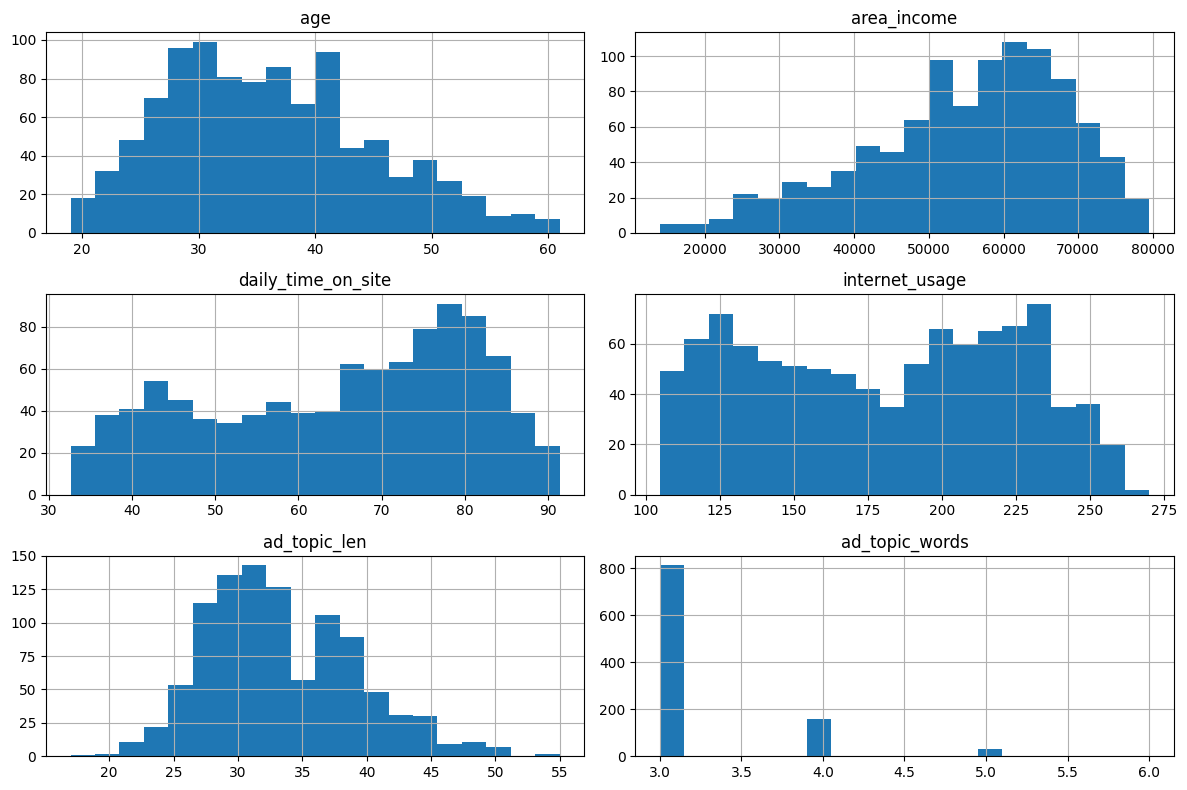

In [19]:
num_cols = ["age", "area_income", "daily_time_on_site", "internet_usage",
            "ad_topic_len", "ad_topic_words"]

df[num_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


## Box plots of features by click outcome

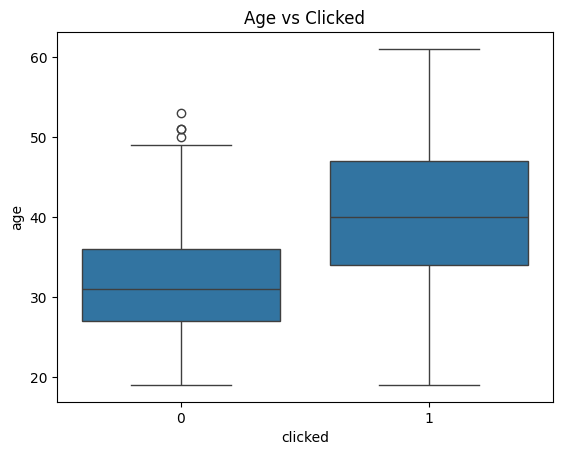

In [27]:
import seaborn as sns

sns.boxplot(x="clicked", y="age", data=df)
plt.title("Age vs Clicked")
plt.show()


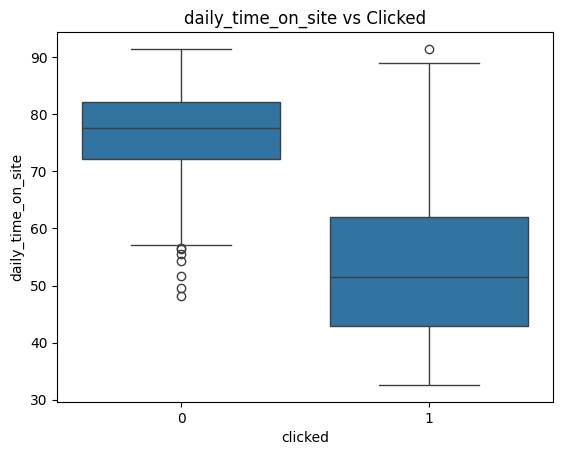

In [28]:
import seaborn as sns

sns.boxplot(x="clicked", y="daily_time_on_site", data=df)
plt.title("daily_time_on_site vs Clicked")
plt.show()


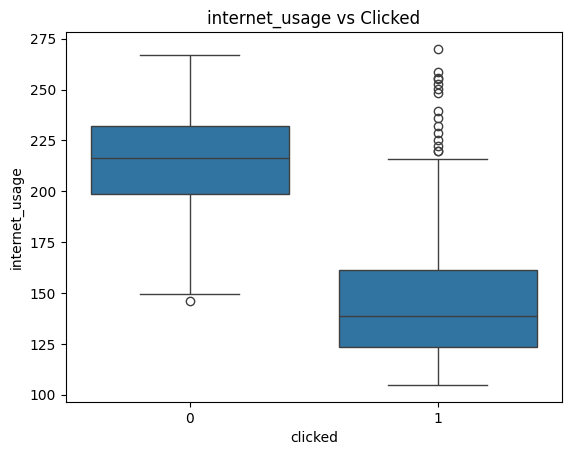

In [29]:
import seaborn as sns

sns.boxplot(x="clicked", y="internet_usage", data=df)
plt.title("internet_usage vs Clicked")
plt.show()


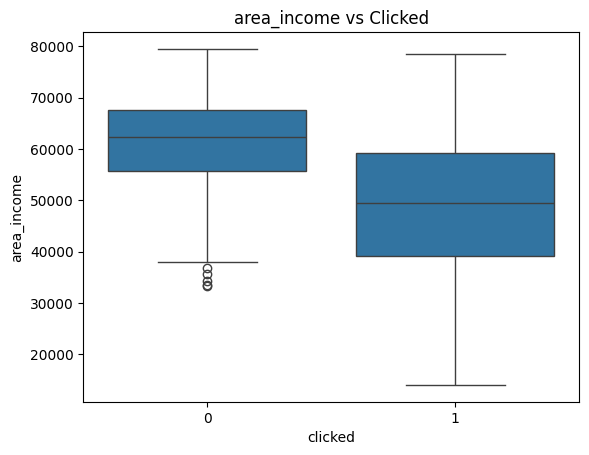

In [30]:
import seaborn as sns

sns.boxplot(x="clicked", y="area_income", data=df)
plt.title("area_income vs Clicked")
plt.show()


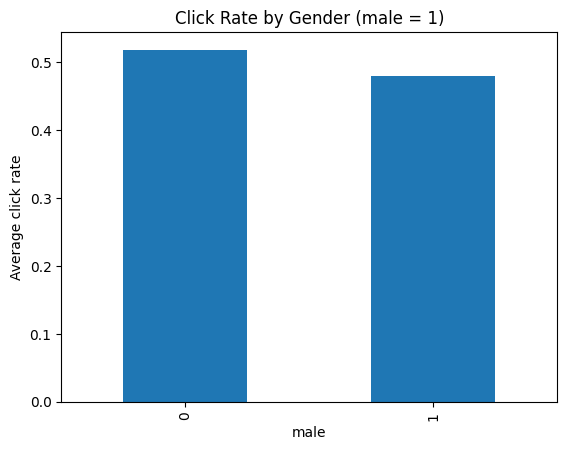

In [39]:
# Average click rate by gender (male = 0 or 1)
gender_click = df.groupby("male")["clicked"].mean()

gender_click.plot(kind="bar")
plt.title("Click Rate by Gender (male = 1)")
plt.ylabel("Average click rate")
plt.xlabel("male")
plt.show()


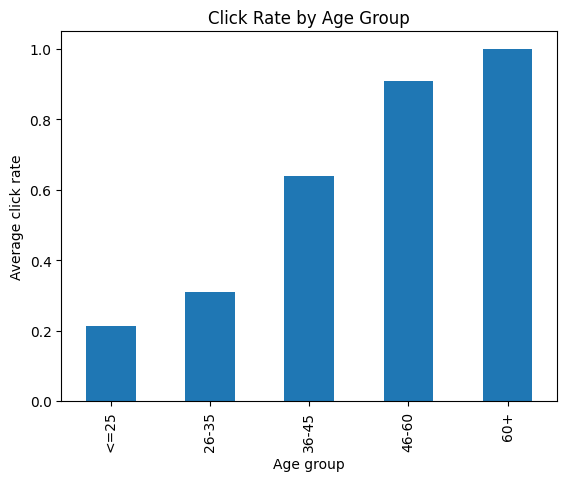

In [42]:

bins = [0, 25, 35, 45, 60, 100]
labels = ["<=25", "26-35", "36-45", "46-60", "60+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

# Average click rate per age group
age_click = df.groupby("age_group", observed=False)["clicked"].mean()


age_click.plot(kind="bar")
plt.title("Click Rate by Age Group")
plt.ylabel("Average click rate")
plt.xlabel("Age group")
plt.show()


## Correlation analysis

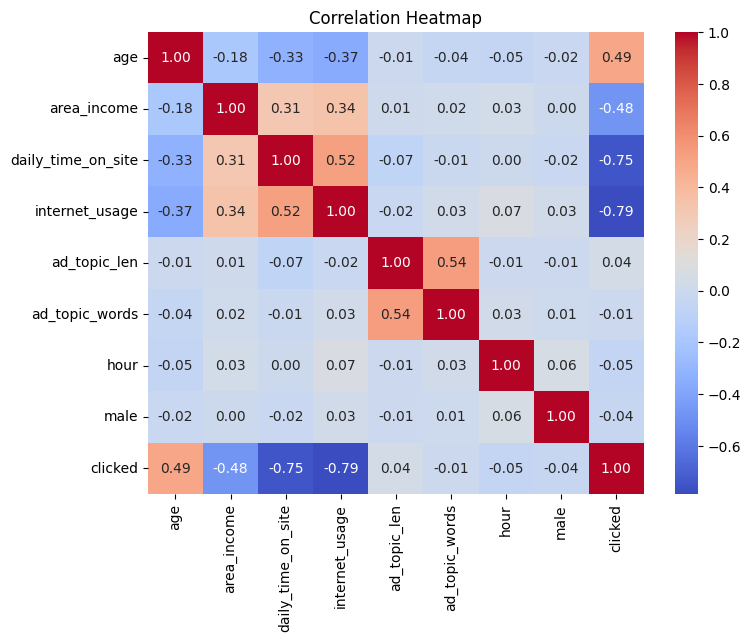

In [33]:
corr = df[["age", "area_income", "daily_time_on_site", "internet_usage",
           "ad_topic_len", "ad_topic_words", "hour", "male", "clicked"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
